In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics_R
from project_utils.feature_stats    import Regression_Container
#from project_utils.acq_data_capture import Acq_Data
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 1


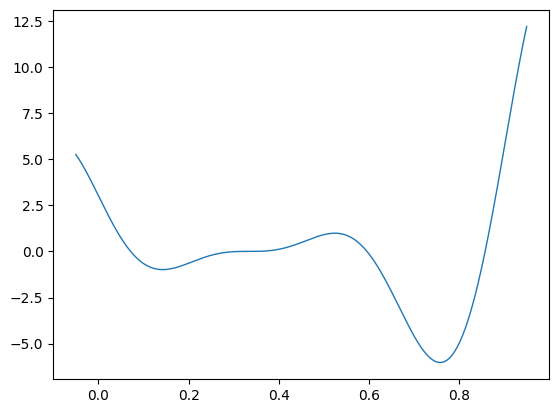

In [2]:
# Load Forrester model

Forrester_Data = BB_Model('Forrester')

#Forrester_Data.df().head()

In [3]:
Forrester_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.15206416348041896


MLPRegressor(random_state=RandomState(MT19937) at 0x1FDF0859840)

In [4]:
Forrester_Data.Random_Forest()

0.9999278741505929


RandomForestRegressor(random_state=RandomState(MT19937) at 0x1FDF0859840)

In [5]:
Forrester_Data.GP()

0.9802458745537892


GaussianProcessRegressor()

In [6]:
print(Forrester_Data.get_features())

['X']


In [7]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()

#Initializing the explainer object
Unravel_Exp = UnRAVELTabularExplainer(bbox_model           = Forrester_Data.get_GP(),
                                      train_data           = X_train,
                                      categorical_features = Forrester_Data.get_catagorical(),
                                      mode                 = Forrester_Data.get_mode())

sur_GP = Surrogate_GP()


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [8]:
#Default settings
#from unravel_2.ur_model import UR_Model

#X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()


##Initializing the explainer object
#Unravel_Exp = UR_Model(bbox_model           = Forrester_Data.get_Random_Forest(),
#                       train_data           = X_train,
#                       categorical_features = Forrester_Data.get_catagorical(),
#                       mode                 = Forrester_Data.get_mode())       


In [9]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [0.4545925]
Std 0:  [0.28908026]


In [10]:
# Generate explantion data for Random Forest

Forrester_Stats = Feature_Statistics_R(feature_names = Forrester_Data.get_features(), mode = Forrester_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
#    data_row  = np.array([X_test[test_instance]])
    data_row  = np.array([0.4])
    
    #scores, acq_data = Unravel_Exp.explain(X_init            = data_row.reshape(1, -1),
    scores = Unravel_Exp.explain(X_init            = data_row.reshape(1, -1),
                                 feature_names     = Forrester_Data.get_features(),
                                 alpha             = "FUR_W",
                                 max_iter          = 20,
                                 interval          = 1,
                                 importance_method = "ARD")
       
    f_predict = Forrester_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    #e_predict = Unravel_Exp.gpmodel_predict(data_row)
    #e_predict = np.array(e_predict).ravel()
    
    acq_data = Unravel_Exp.get_acq_data()
    
    X, y = Unravel_Exp.get_surrogate_data()

    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(Unravel_Exp.get_surrogate_data())

    print(f_predict, e_predict)
    
    Forrester_Stats.Add_Sample(sample_scores = scores,
                               outcome       = y_test[test_instance],
                               X_row         = data_row,
                               f_prediction  = f_predict,
                               e_prediction  = e_predict.ravel(),
                               feopt         = acq_data.get_fe_x0())


INSTANCE:  0
Acq_Data_1D
[6.27456665e-01 1.00000004e-05]
[0.11595557] [6.27456665e-01 1.00000004e-05]


Average, SD, and Max Differences:
y - BB(x):           4.560853495351488  :  0.0  :  4.560853495351488
y - exp(x):          4.049352399136469  :  0.0  :  4.049352399136469
BB(x) - exp(x):      0.5115010962150196  :  0.0  :  0.5115010962150196
Average exp(x) Uncertainty:  1.0000000413701846e-05
R Score:   nan
Fidelity:  0.9036


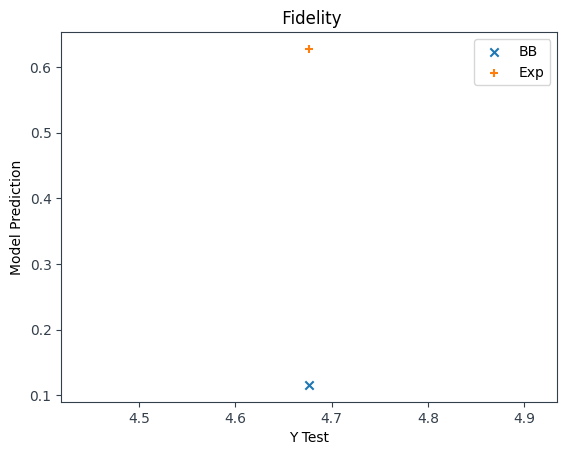

In [11]:
Forrester_Stats.Fidelity()

In [12]:
#Forrester_Stats.Jaccard_Values()

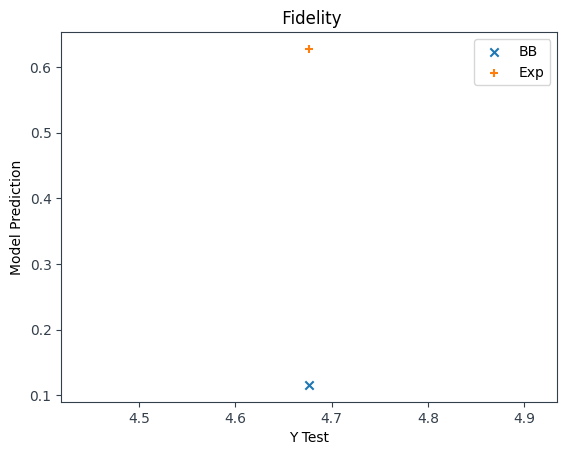

In [13]:
Forrester_Stats.Reg_Fidelity_Graph()

In [14]:
acq_data.get_fe_x0()

array([[0.62745667]])

In [15]:
acq_data.Add_BB_model(Forrester_Data.get_Random_Forest())
acq_data.Create_BB_plot()

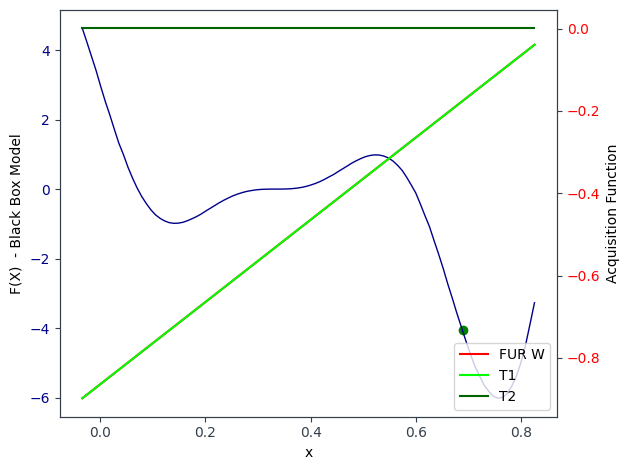

In [16]:
acq_data.plot_point(0)

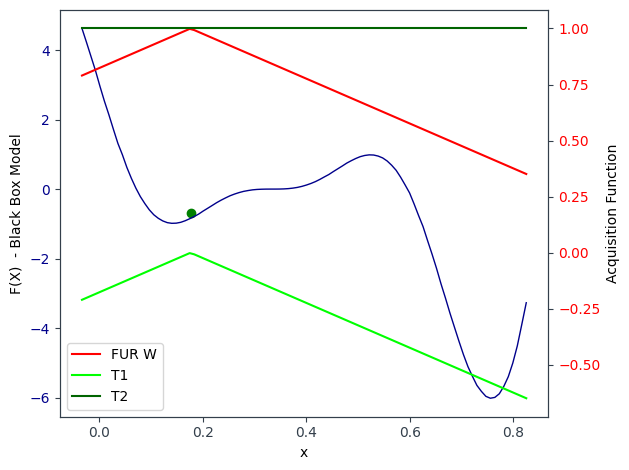

In [17]:
acq_data.plot_point(1)

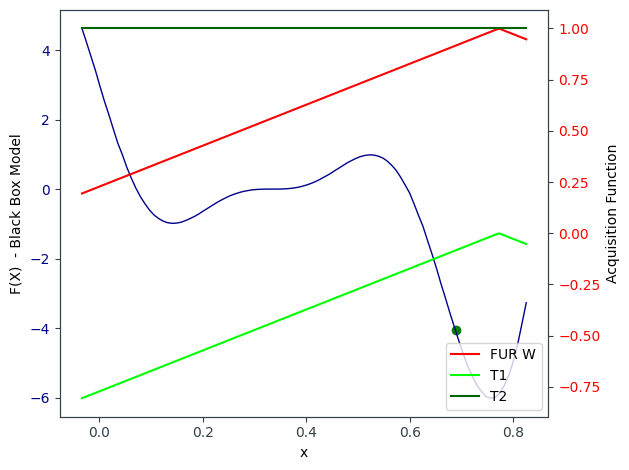

In [18]:
acq_data.plot_point(2)

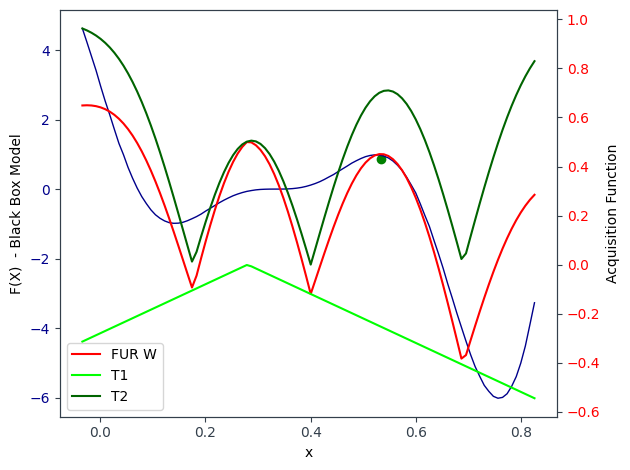

In [19]:
acq_data.plot_point(3)

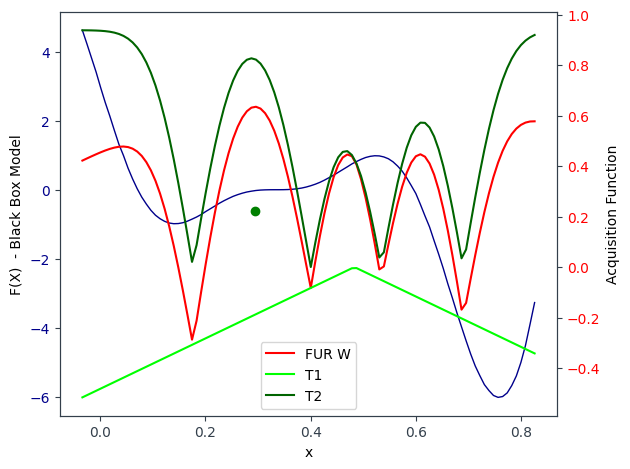

In [20]:
acq_data.plot_point(4)

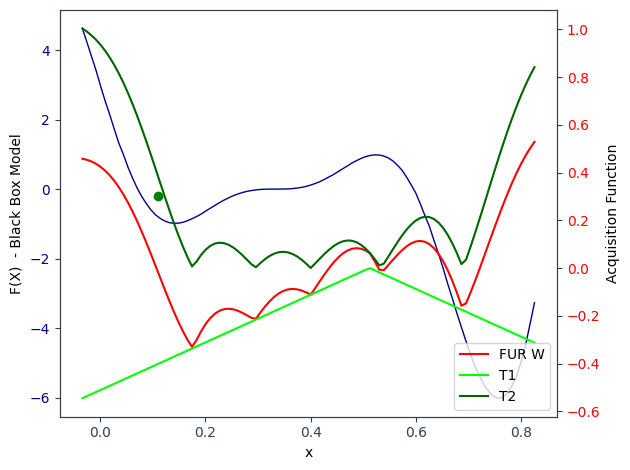

In [21]:
acq_data.plot_point(5)

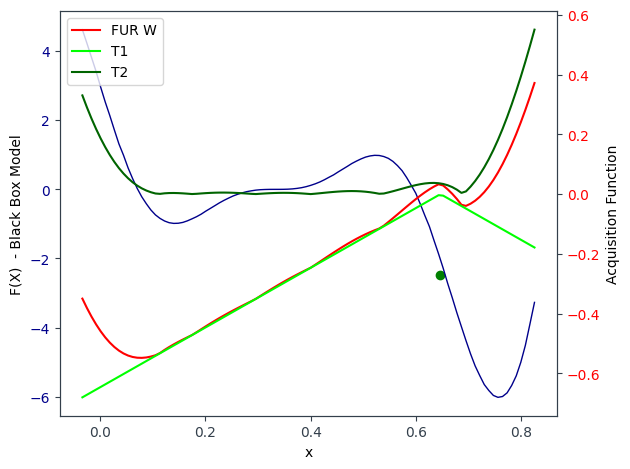

In [22]:
acq_data.plot_point(6)

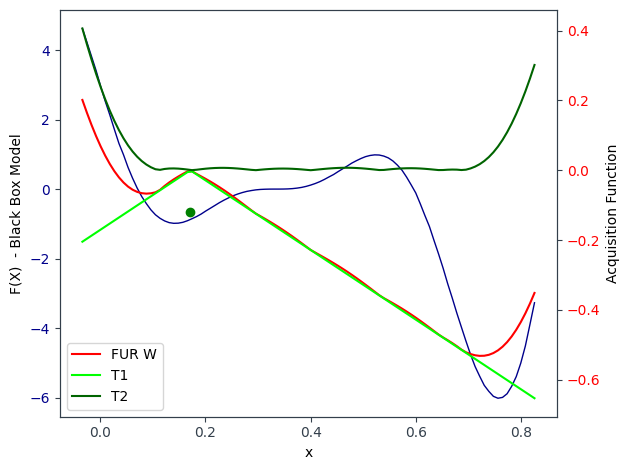

In [23]:
acq_data.plot_point(7)

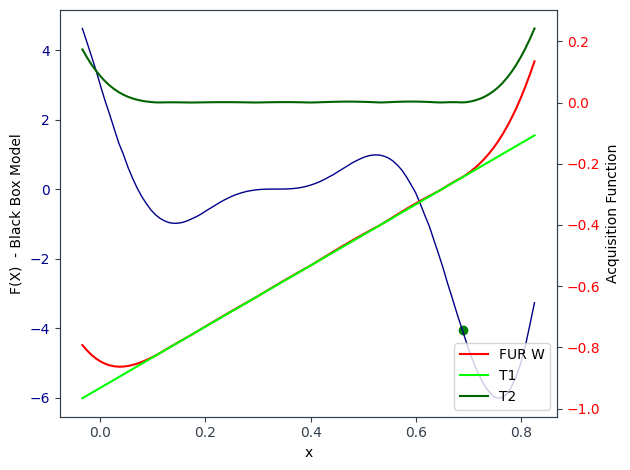

In [24]:
acq_data.plot_point(8)

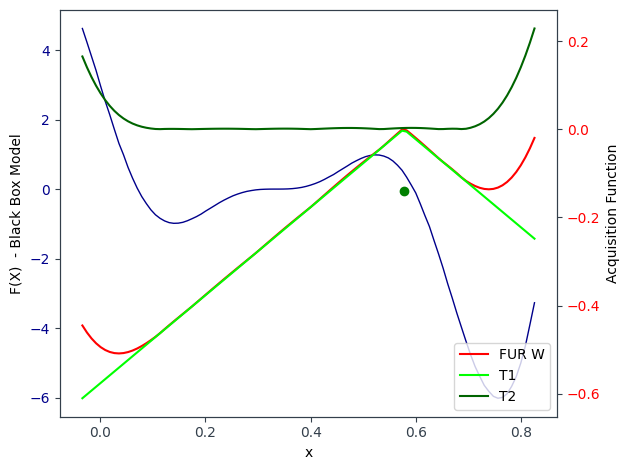

In [25]:
acq_data.plot_point(9)

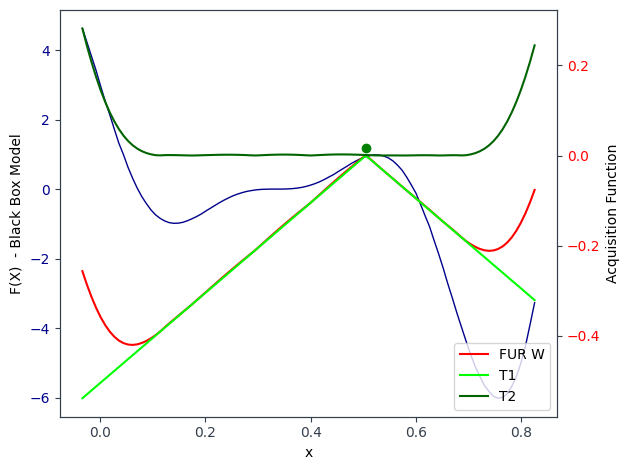

In [26]:
acq_data.plot_point(10)

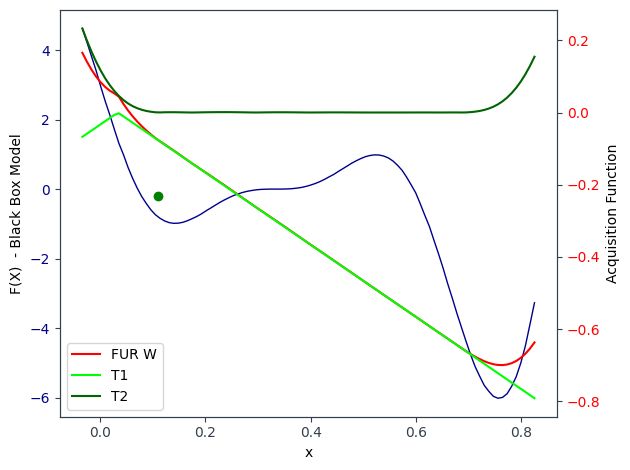

In [27]:
acq_data.plot_point(11)

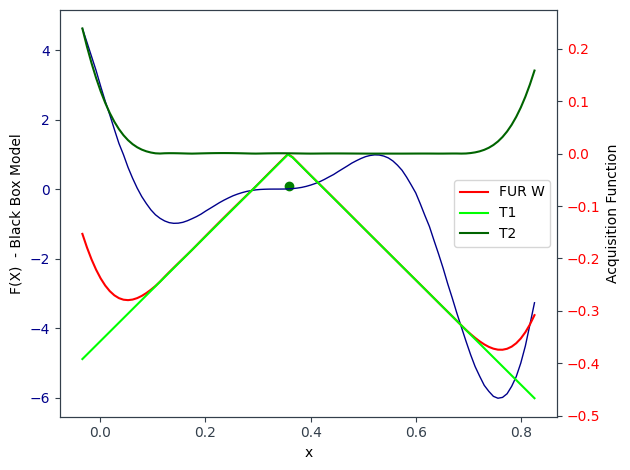

In [28]:
acq_data.plot_point(12)

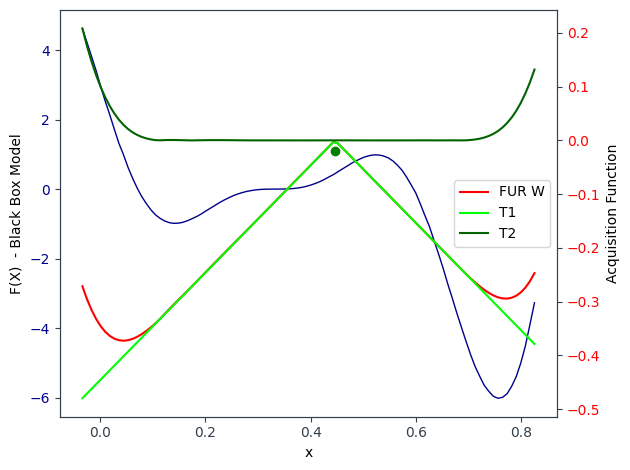

In [29]:
acq_data.plot_point(13)

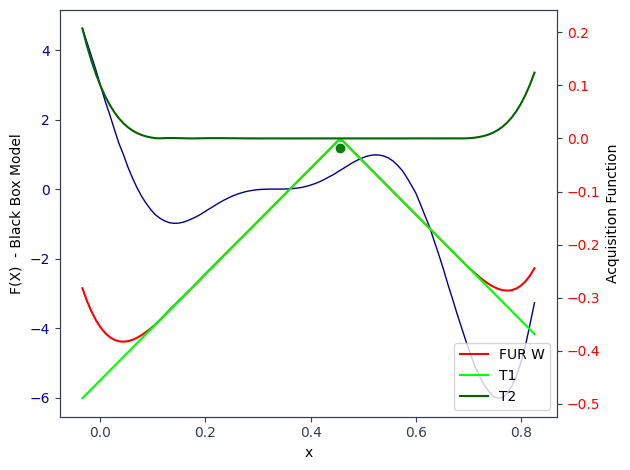

In [30]:
acq_data.plot_point(14)

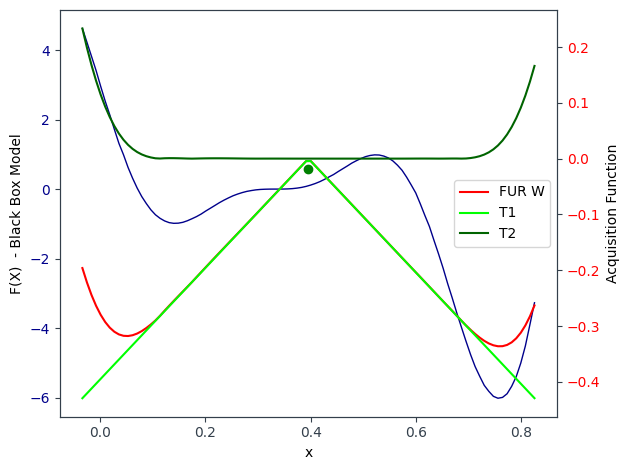

In [31]:
acq_data.plot_point(15)

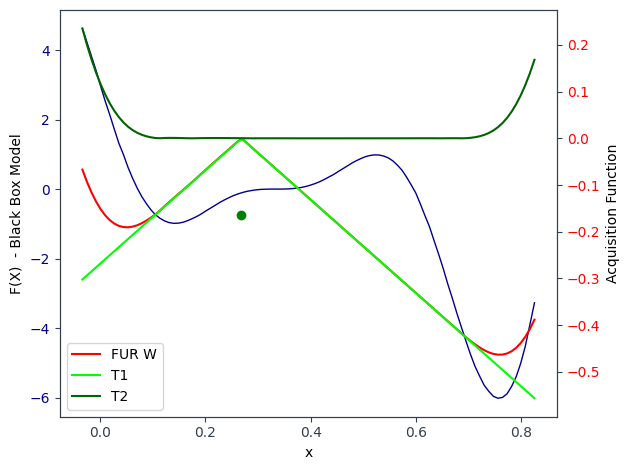

In [32]:
acq_data.plot_point(16)

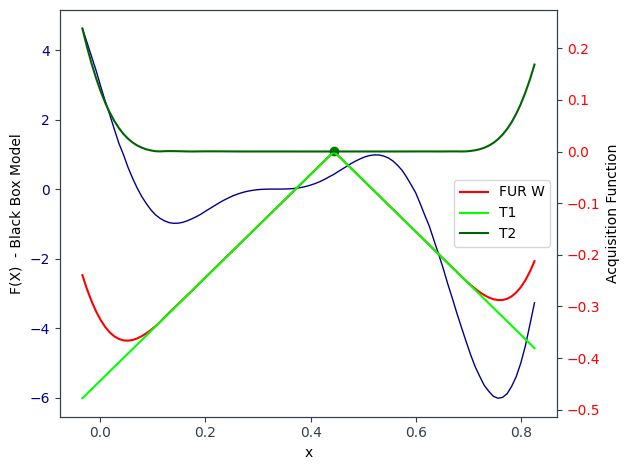

In [33]:
acq_data.plot_point(17)

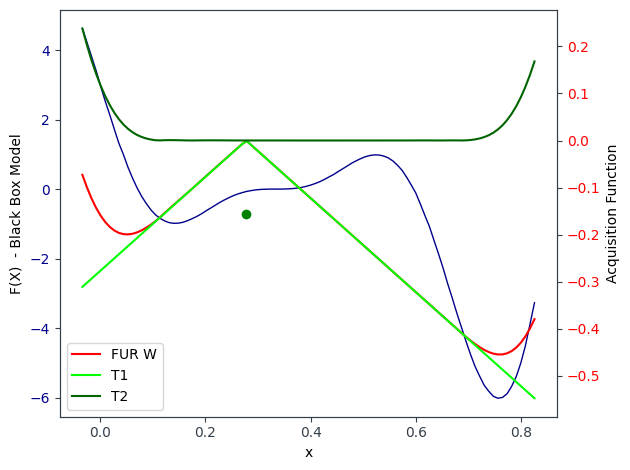

In [34]:
acq_data.plot_point(18)

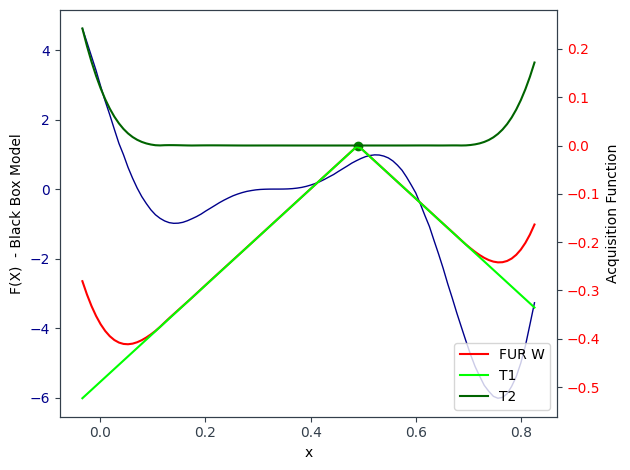

In [35]:
acq_data.plot_point(19)

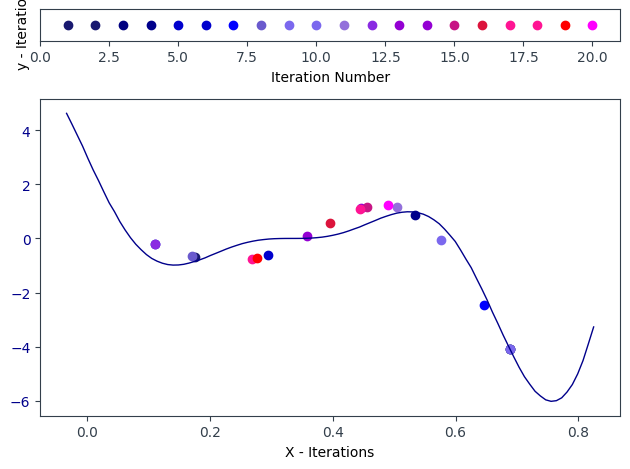

In [36]:
acq_data.plot_all()